In [1]:
import sys
sys.path.append('..')

import numpy as np
import pandas as pd
import plotnine as gg

from utils.read_log import read_log

In [2]:
df = read_log('log/log33.log')
df.to_csv('log/log33.csv')
df

,time,finish,qty,n,rlack_list_i,score
0,2022-03-09 18:55:50.619143,0.00,10,10,0.1,0.1028
1,2022-03-09 18:56:23.055636,0.05,10,10,0.2,0.5347
2,2022-03-09 18:56:58.406230,0.10,10,10,0.3,0.4898
3,2022-03-09 18:57:28.658512,0.15,10,10,0.4,0.3410
4,2022-03-09 18:58:09.663023,0.20,10,10,0.5,0.4499
...,...,...,...,...,...,...
1533,2022-03-11 11:28:54.834253,77.42,510,160,0.4,0.8905
1534,2022-03-11 11:29:52.742023,77.47,510,160,0.5,0.8734
1535,2022-03-11 11:30:50.154426,77.53,510,160,0.6,0.9477
1536,2022-03-11 11:31:51.729931,77.58,510,160,0.7,0.9349


/home/zhangshenhao/miniconda3/envs/analysis/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 405 rows containing non-finite values.


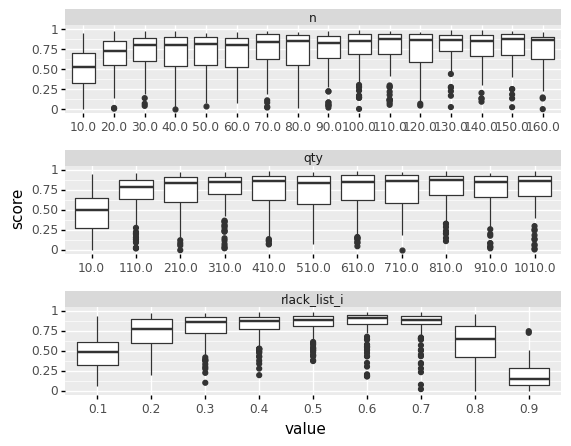

<ggplot: (8737711125378)>

In [3]:

data = (
    df
    .melt(value_vars=['qty','n','rlack_list_i'],id_vars='score')
    .assign(value=lambda dt:pd.Series(dt.value,dtype='category'))
)

(
    gg.ggplot(data=data)
    +gg.aes('value','score')
    # +gg.geom_point()
    # +gg.geom_smooth(method='lowess')
    +gg.geom_boxplot()
    +gg.facet_wrap('variable',nrow=3,scales='free')
    +gg.scale_y_continuous(limits=[0,1])
    +gg.theme(subplots_adjust={'hspace': 0.6})
)

/home/zhangshenhao/miniconda3/envs/analysis/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_boxplot : Removed 135 rows containing non-finite values.


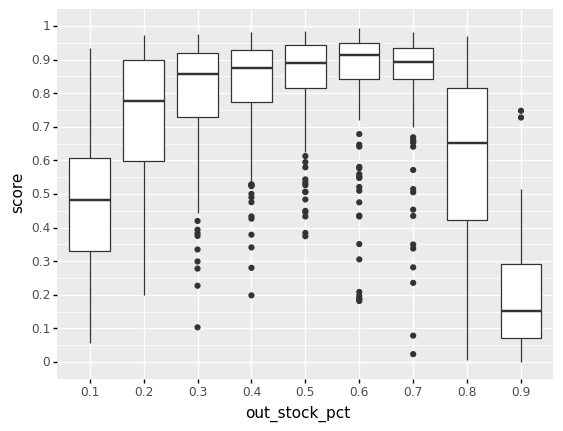

<ggplot: (8737709912769)>

In [9]:

data = df.assign(
    qty = lambda dt:dt.qty.astype('category'),
    n = lambda dt:dt.n.astype('category'),
    rlack_list_i = lambda dt:dt.rlack_list_i.astype('category')
)

(
    gg.ggplot(data=data)
    +gg.aes('rlack_list_i','score')
    +gg.geom_boxplot()
    +gg.scale_y_continuous(limits=[0,1],breaks=np.arange(0,1.1,0.1))
    +gg.xlab('out_stock_pct')
)

# (
#     gg.ggplot(data=df)
#     +gg.aes('rlack_list_i','score')
#     +gg.geom_point()
#     +gg.geom_smooth(method='lowess')
#     +gg.scale_y_continuous(limits=[0,1],breaks=np.arange(0,1.1,0.1))
# )

In [33]:
df1 = (
    data
    .groupby('rlack_list_i',as_index=False)['score']
    .agg(lambda x:np.quantile(a=x,q=0.5))
)

df2 = (
    data
    .groupby('n',as_index=False)['score']
    .agg(lambda x:np.quantile(a=x,q=0.5))
)

df3 = (
    data
    .groupby('qty',as_index=False)['score']
    .agg(lambda x:np.quantile(a=x,q=0.5))
)

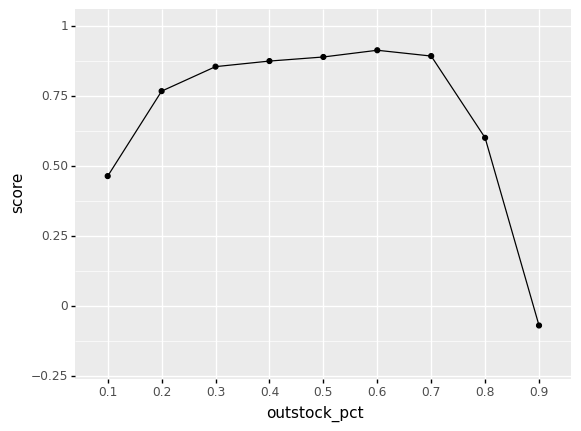

<ggplot: (8737711121583)>

In [34]:
(
    gg.ggplot(data=df1,mapping=gg.aes(x='rlack_list_i',y='score',group=1))
    +gg.geom_point()
    +gg.geom_line()
    +gg.scale_y_continuous(limits=[-0.2,1])
    +gg.xlab('outstock_pct')
)

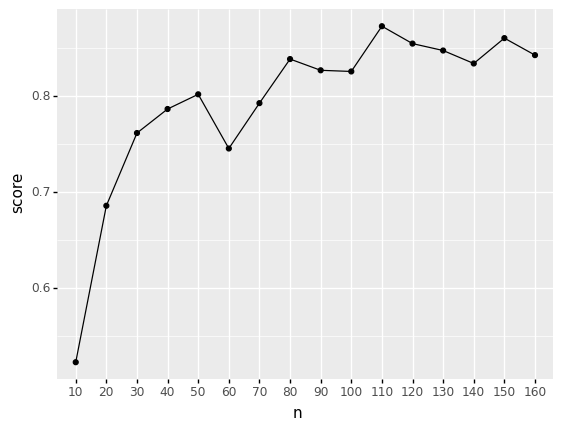

<ggplot: (8737710168766)>

In [45]:
(
    gg.ggplot(data=df2,mapping=gg.aes(x='n',y='score',group=1))
    +gg.geom_point()
    +gg.geom_line()
)

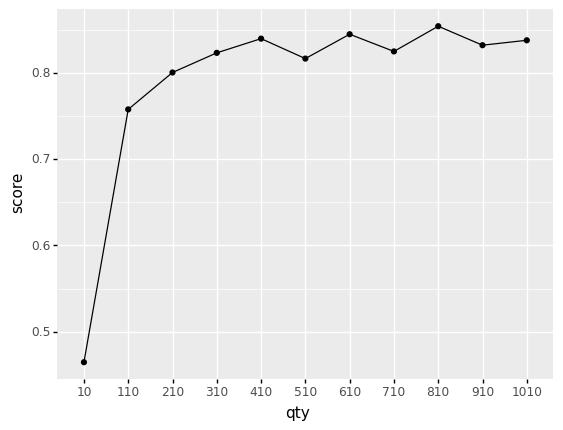

<ggplot: (8737710165592)>

In [44]:
(
    gg.ggplot(data=df3,mapping=gg.aes(x='qty',y='score',group=1))
    +gg.geom_point()
    +gg.geom_line()
)